**PREDICTING  OVARIAN CANCER RISK AND PROGRESSION USING CLINICAL AND BIOLOGICAL DATA**

**INTRODUCTION**

Ovarian Cancer is one of the deadliest gynecological diseases faced by women today. Lack of awareness about early symptoms and others contributes to the spread of this disease. Predicting the risk and progression of ovarian cancer using biological and clinical data can significantly improve early detection, personalized treatment strategies, and patient outcomes. 

This project focuses on developing a machine learning-based predictive model that integrates clinical and biological data to assess ovarian cancer risk and progression. By leveraging patient demographics, medical history, laboratory test results imaging data, and genetic mutations, we aim to provide a data-driven approach to assist in early diagnosis and progression estimation.

**IMPORT THE STATEMENTS AND DATA PRE-PROCESSING**

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,roc_auc_score
from sklearn.metrics import accuracy_score,f1_score

In [61]:
df=pd.read_csv("D:\\My project\\Ovarian_patient_data.csv")

In [62]:
df

,Timestamp,Age,BMI,Comorbidity,Symptom,CA125,CancerStage,Histopathology,PreviousTreatment,MenstrualHistory,...,RadiomicIntensity,RadiomicShape,DopplerVelocity,Parity,OralContraceptives,HormoneTherapy,MenarcheAge,MenopauseAge,RiskLabel,ProgressionProbability
0,01-01-2019 00:00,67.450712,27.468755,0,0,66.738329,0,serous,0,regular,...,57.572038,1.285647,1.948916,0,0,0,12.077803,54.947593,2,0.176654
1,01-01-2019 01:00,57.926035,27.736019,1,0,28.390526,1,clear cell,0,regular,...,44.385558,0.656970,3.589821,0,0,0,12.745908,46.864164,0,0.343371
2,01-01-2019 02:00,69.715328,22.285561,0,0,118.120787,3,clear cell,1,regular,...,35.711312,1.034179,3.625658,0,0,0,12.495603,55.757130,0,0.036907
3,01-01-2019 03:00,82.845448,31.315519,1,1,6.418598,0,serous,1,regular,...,49.922109,1.000078,1.108221,0,0,0,12.577276,50.462495,1,0.161943
4,01-01-2019 04:00,56.487699,17.056296,1,0,65.912779,1,mucinous,0,regular,...,43.547336,1.415819,1.030482,2,0,0,14.698884,58.628299,0,0.554210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200095,29-10-2041 07:00,56.482842,37.250369,1,1,10.963560,3,serous,0,regular,...,52.644672,0.500000,3.499102,0,0,0,12.593397,53.628508,2,0.179641
200096,29-10-2041 08:00,45.268634,16.790468,0,0,66.198115,0,serous,0,irregular,...,46.996590,1.009867,2.807436,1,0,0,13.653758,52.514075,3,0.312034
200097,29-10-2041 09:00,77.853943,21.333605,0,0,41.621119,2,serous,0,regular,...,50.529664,0.829427,4.394963,0,0,0,10.527138,60.000000,2,0.043449
200098,29-10-2041 10:00,71.047060,31.607421,1,0,59.717572,0,serous,0,regular,...,48.182645,0.989097,2.777310,0,0,0,13.053107,51.423338,0,0.223509


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200100 entries, 0 to 200099
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Timestamp               200100 non-null  object 
 1   Age                     200100 non-null  float64
 2   BMI                     200100 non-null  float64
 3   Comorbidity             200100 non-null  int64  
 4   Symptom                 200100 non-null  int64  
 5   CA125                   200100 non-null  float64
 6   CancerStage             200100 non-null  int64  
 7   Histopathology          200100 non-null  object 
 8   PreviousTreatment       200100 non-null  int64  
 9   MenstrualHistory        200100 non-null  object 
 10  Ethnicity               200100 non-null  object 
 11  Smoking                 200100 non-null  int64  
 12  Alcohol                 200100 non-null  int64  
 13  Residence               200100 non-null  object 
 14  SocioeconomicStatus 

In [64]:
df.describe()

,Age,BMI,Comorbidity,Symptom,CA125,CancerStage,PreviousTreatment,Smoking,Alcohol,BRCA_Mutation,...,RadiomicIntensity,RadiomicShape,DopplerVelocity,Parity,OralContraceptives,HormoneTherapy,MenarcheAge,MenopauseAge,RiskLabel,ProgressionProbability
count,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,...,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000
mean,59.901575,28.003226,0.300000,0.402384,34.874555,0.996067,0.199530,0.199825,0.250855,0.150025,...,50.030013,0.999722,2.496380,0.653193,0.199940,0.148931,13.014028,50.006837,0.650440,0.285436
std,14.668235,4.980700,0.458259,0.490380,34.411115,1.223703,0.399648,0.399870,0.433506,0.357097,...,9.993355,0.275003,1.443022,0.911912,0.399956,0.356021,1.468198,4.783299,0.909397,0.160168
min,18.000000,15.000000,0.000000,0.000000,0.000018,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.215829,0.500000,0.000007,0.000000,0.000000,0.000000,10.000000,40.000000,0.000000,0.000647
25%,49.891372,24.616558,0.000000,0.000000,10.057735,0.000000,0.000000,0.000000,0.000000,0.000000,...,43.288079,0.796569,1.243463,0.000000,0.000000,0.000000,11.988691,46.674184,0.000000,0.160298
50%,60.025998,27.998428,0.000000,0.000000,24.162441,0.000000,0.000000,0.000000,0.000000,0.000000,...,50.004486,1.000032,2.500433,0.000000,0.000000,0.000000,12.999088,50.006139,0.000000,0.264014
75%,70.141600,31.361152,1.000000,1.000000,48.421526,2.000000,0.000000,0.000000,1.000000,0.000000,...,56.784981,1.202314,3.743309,1.000000,0.000000,0.000000,14.013925,53.357075,1.000000,0.389292
max,90.000000,49.096832,1.000000,1.000000,200.000000,4.000000,1.000000,1.000000,1.000000,1.000000,...,99.203153,1.500000,4.999994,3.000000,1.000000,1.000000,18.000000,60.000000,3.000000,0.950690


In [65]:
df.describe(include="object")

,Timestamp,Histopathology,MenstrualHistory,Ethnicity,Residence,SocioeconomicStatus,TumorLocation
count,200100,200100,200100,200100,200100,200100,200100
unique,200100,3,2,4,2,3,3
top,01-01-2019 00:00,serous,regular,Caucasian,Urban,Middle,Ovary
freq,1,140444,140157,119814,140325,100425,160263


In [68]:
missing_values=df.isnull().sum()

In [71]:
missing_values

Timestamp                 0
Age                       0
BMI                       0
Comorbidity               0
Symptom                   0
CA125                     0
CancerStage               0
Histopathology            0
PreviousTreatment         0
MenstrualHistory          0
Ethnicity                 0
Smoking                   0
Alcohol                   0
Residence                 0
SocioeconomicStatus       0
BRCA_Mutation             0
GeneExpression            0
SNP_Status                0
DNAMethylation            0
miRNA                     0
TumorSize                 0
TumorLocation             0
EnhancementPattern        0
RadiomicTexture           0
RadiomicIntensity         0
RadiomicShape             0
DopplerVelocity           0
Parity                    0
OralContraceptives        0
HormoneTherapy            0
MenarcheAge               0
MenopauseAge              0
RiskLabel                 0
ProgressionProbability    0
dtype: int64

In [74]:
duplicates=df.duplicated().sum()

In [76]:
duplicates

0

In [77]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("*")

Timestamp
01-01-2019 00:00    1
22-03-2034 00:00    1
21-03-2034 02:00    1
21-03-2034 03:00    1
21-03-2034 04:00    1
                   ..
11-08-2026 06:00    1
11-08-2026 07:00    1
11-08-2026 08:00    1
11-08-2026 09:00    1
29-10-2041 11:00    1
Name: count, Length: 200100, dtype: int64
*
Histopathology
serous        140444
mucinous       39882
clear cell     19774
Name: count, dtype: int64
*
MenstrualHistory
regular      140157
irregular     59943
Name: count, dtype: int64
*
Ethnicity
Caucasian    119814
Asian         40271
African       29946
Hispanic      10069
Name: count, dtype: int64
*
Residence
Urban    140325
Rural     59775
Name: count, dtype: int64
*
SocioeconomicStatus
Middle    100425
Low        79770
High       19905
Name: count, dtype: int64
*
TumorLocation
Ovary             160263
Fallopian Tube     30004
Peritoneum          9833
Name: count, dtype: int64
*


*ENCODING THE DATASET*

In [82]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [84]:
data = df.drop(columns=['DopplerVelocity','CA125','Histopathology','Comorbidity', 'Ethnicity',]) 


In [86]:
data

,Timestamp,Age,BMI,Symptom,CancerStage,PreviousTreatment,MenstrualHistory,Smoking,Alcohol,Residence,...,RadiomicTexture,RadiomicIntensity,RadiomicShape,Parity,OralContraceptives,HormoneTherapy,MenarcheAge,MenopauseAge,RiskLabel,ProgressionProbability
0,01-01-2019 00:00,67.450712,27.468755,0,0,0,regular,0,0,Urban,...,0.082624,57.572038,1.285647,0,0,0,12.077803,54.947593,2,0.176654
1,01-01-2019 01:00,57.926035,27.736019,0,1,0,regular,0,0,Urban,...,4.623101,44.385558,0.656970,0,0,0,12.745908,46.864164,0,0.343371
2,01-01-2019 02:00,69.715328,22.285561,0,3,1,regular,0,0,Urban,...,1.319485,35.711312,1.034179,0,0,0,12.495603,55.757130,0,0.036907
3,01-01-2019 03:00,82.845448,31.315519,1,0,1,regular,0,0,Urban,...,0.028842,49.922109,1.000078,0,0,0,12.577276,50.462495,1,0.161943
4,01-01-2019 04:00,56.487699,17.056296,0,1,0,regular,0,1,Rural,...,4.662631,43.547336,1.415819,2,0,0,14.698884,58.628299,0,0.554210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200095,29-10-2041 07:00,56.482842,37.250369,1,3,0,regular,0,0,Rural,...,0.870326,52.644672,0.500000,0,0,0,12.593397,53.628508,2,0.179641
200096,29-10-2041 08:00,45.268634,16.790468,0,0,0,irregular,0,0,Rural,...,0.059208,46.996590,1.009867,1,0,0,13.653758,52.514075,3,0.312034
200097,29-10-2041 09:00,77.853943,21.333605,0,2,0,regular,0,0,Urban,...,4.748092,50.529664,0.829427,0,0,0,10.527138,60.000000,2,0.043449
200098,29-10-2041 10:00,71.047060,31.607421,0,0,0,regular,0,0,Rural,...,2.699625,48.182645,0.989097,0,0,0,13.053107,51.423338,0,0.223509


In [88]:
data['Age']=pd.to_numeric(data['Age'],errors='coerce')

In [90]:
data['Age'] = data['Age'].astype(int)

In [92]:
data['CancerStage']=data['CancerStage'].astype(str)

In [94]:
data['Age_BMI_diff'] = data['Age'] - data['BMI']

In [96]:
print(data.head())

          Timestamp  Age        BMI  Symptom CancerStage  PreviousTreatment  \
0  01-01-2019 00:00   67  27.468755        0           0                  0   
1  01-01-2019 01:00   57  27.736019        0           1                  0   
2  01-01-2019 02:00   69  22.285561        0           3                  1   
3  01-01-2019 03:00   82  31.315519        1           0                  1   
4  01-01-2019 04:00   56  17.056296        0           1                  0   

  MenstrualHistory  Smoking  Alcohol Residence  ... RadiomicIntensity  \
0          regular        0        0     Urban  ...         57.572038   
1          regular        0        0     Urban  ...         44.385558   
2          regular        0        0     Urban  ...         35.711312   
3          regular        0        0     Urban  ...         49.922109   
4          regular        0        1     Rural  ...         43.547336   

   RadiomicShape  Parity  OralContraceptives  HormoneTherapy  MenarcheAge  \
0       1

In [98]:
data = data.dropna()  

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200100 entries, 0 to 200099
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Timestamp               200100 non-null  object 
 1   Age                     200100 non-null  int32  
 2   BMI                     200100 non-null  float64
 3   Symptom                 200100 non-null  int64  
 4   CancerStage             200100 non-null  object 
 5   PreviousTreatment       200100 non-null  int64  
 6   MenstrualHistory        200100 non-null  object 
 7   Smoking                 200100 non-null  int64  
 8   Alcohol                 200100 non-null  int64  
 9   Residence               200100 non-null  object 
 10  SocioeconomicStatus     200100 non-null  object 
 11  BRCA_Mutation           200100 non-null  int64  
 12  GeneExpression          200100 non-null  float64
 13  SNP_Status              200100 non-null  int64  
 14  DNAMethylation      

In [102]:
if 'Timestamp' in data.columns:
    try:
        
        data['Timestamp'] = pd.to_datetime(data['Timestamp'], dayfirst=True, errors='coerce')
    except Exception as e:
        print("Error in Timestamp conversion:", e)
    
    
    data['Year'] = data['Timestamp'].dt.year
    data['Month'] = data['Timestamp'].dt.month
    data['Day'] = data['Timestamp'].dt.day

    
    data.drop(columns=['Timestamp'], inplace=True)
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  
data.fillna(data.median(numeric_only=True), inplace=True)

In [103]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna('Unknown', inplace=True)  
    else:
        data[col].fillna(data[col].median(), inplace=True)  

In [104]:
label_encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(df[col])
    

In [105]:
data.to_csv("D:\\My project\\Ovarian_patient_data_encoded.csv", index=False)

**VISUALIZATION**

Age Distribution of Patients

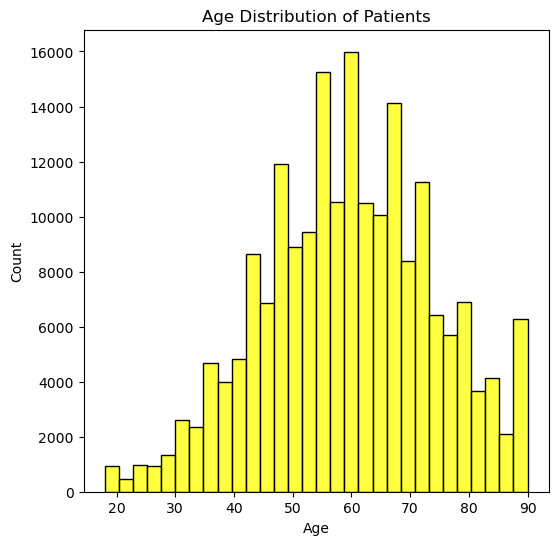

In [111]:
plt.figure(figsize=(6,6))
sns.histplot(data['Age'],bins=30,color="yellow")
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel=("Frequency")
plt.show()

Tumorsize VS Age of Patients

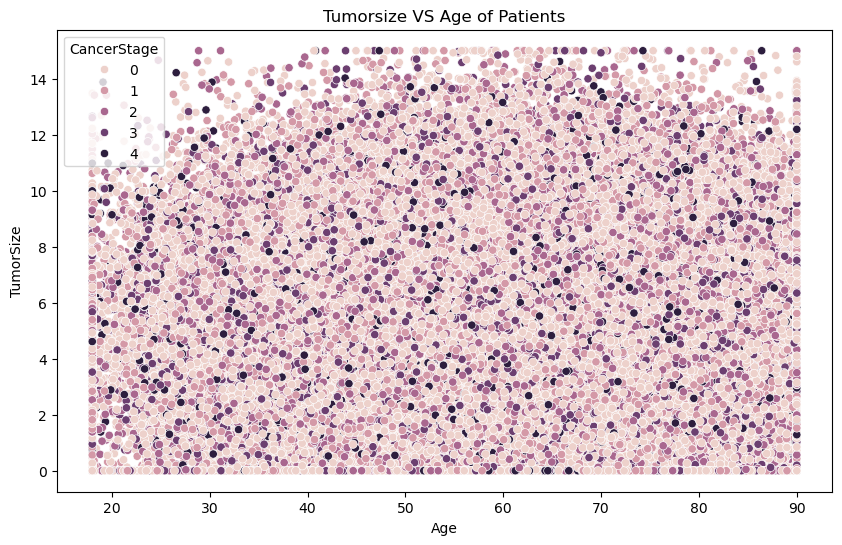

In [113]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Age',y='TumorSize',hue='CancerStage')
plt.title("Tumorsize VS Age of Patients")
plt.xlabel("Age")
plt.ylabel=("TumorSize")
plt.show()

CancerStage Distribution

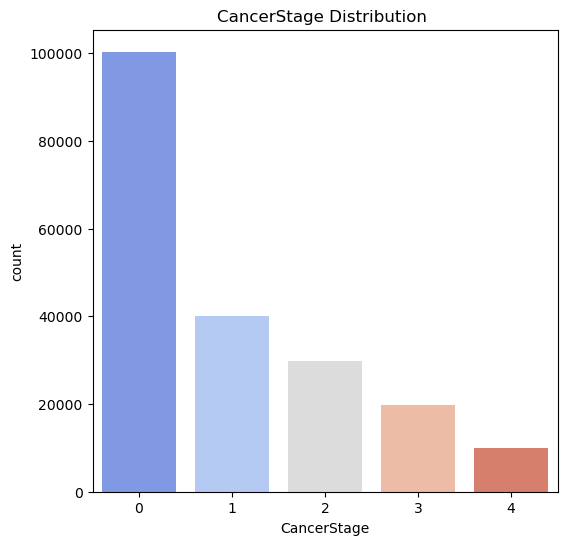

In [115]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='CancerStage',palette='coolwarm')
plt.title("CancerStage Distribution ")
plt.xlabel("CancerStage")
plt.ylabel=("Number of Patients")
plt.show()

Correlation Heatmap

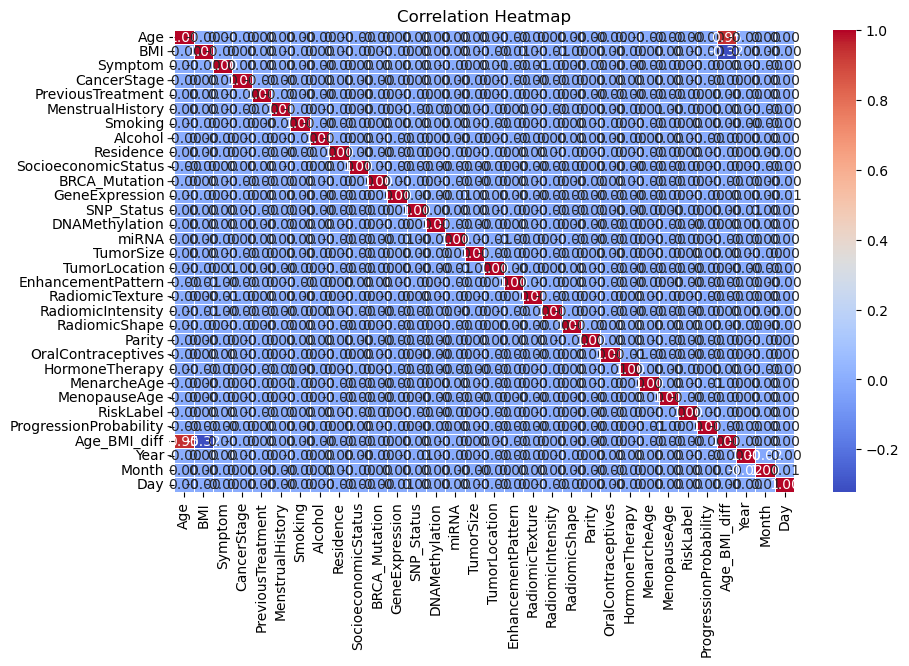

In [117]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm',linewidths=0.6, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

BMI

<Axes: ylabel='BMI'>

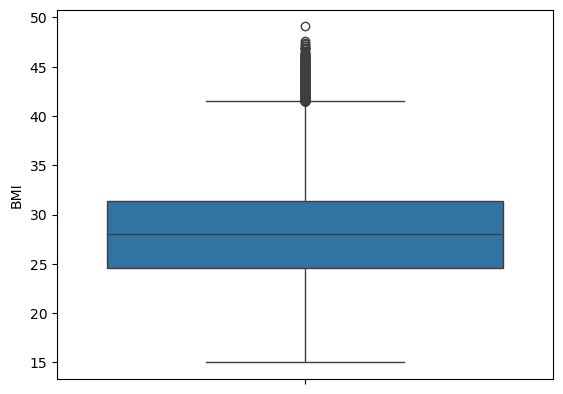

In [119]:
sns.boxplot(df['BMI'])

***MODEL BUILDING AND TRAINING***

In [123]:
X = data.drop(columns=["CancerStage"])  
y = data["CancerStage"] 

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=60)

In [156]:
y_true = [1, 0, 1, 1, 0]
y_pred = [1, 1, 1, 0, 0]

In [158]:
f1 = f1_score(y_true, y_pred)
print(f1)

0.6666666666666666


**DECISION TREE CLASSIFIER**

Model Accuracy: 0.3187

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.48      0.49     30039
           1       0.20      0.21      0.20     12094
           2       0.15      0.16      0.16      8923
           3       0.10      0.10      0.10      5951
           4       0.05      0.05      0.05      3023

    accuracy                           0.32     60030
   macro avg       0.20      0.20      0.20     60030
weighted avg       0.33      0.32      0.32     60030



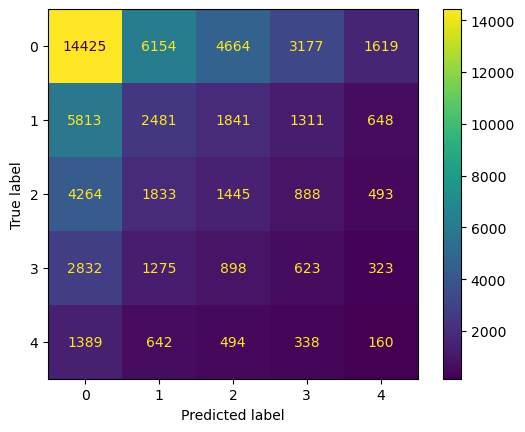

In [161]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

**RANDOM FOREST CLASSIFIER**

In [163]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [164]:
y_pred = rf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [165]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.5001

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67     30039
           1       0.27      0.00      0.00     12094
           2       0.00      0.00      0.00      8923
           3       0.00      0.00      0.00      5951
           4       0.00      0.00      0.00      3023

    accuracy                           0.50     60030
   macro avg       0.15      0.20      0.13     60030
weighted avg       0.30      0.50      0.33     60030



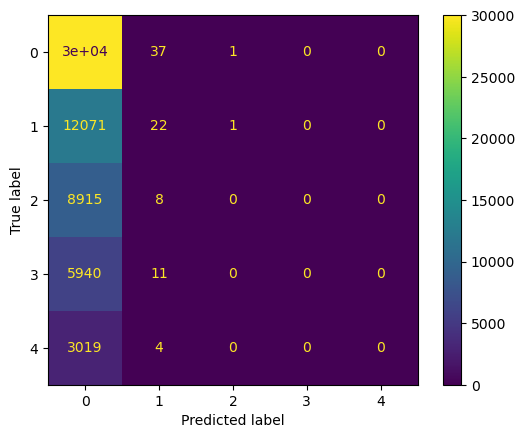

In [166]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

**LOGISTIC REGRESSION**

In [168]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Model Accuracy: 0.5004

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67     30039
           1       0.00      0.00      0.00     12094
           2       0.00      0.00      0.00      8923
           3       0.00      0.00      0.00      5951
           4       0.00      0.00      0.00      3023

    accuracy                           0.50     60030
   macro avg       0.10      0.20      0.13     60030
weighted avg       0.25      0.50      0.33     60030



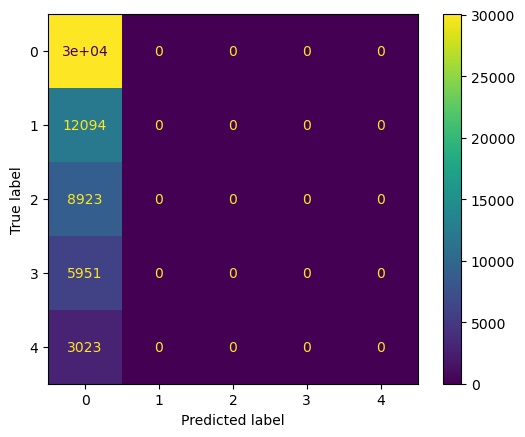

In [169]:
y_pred = lr.predict(X_test)
base_preds = lr.predict(X_test)
base_preds
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


**KNeighborsClassifier**

In [171]:
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [172]:
y_pred = knn.predict(X_test)

Model Accuracy: 0.4324

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.79      0.61     30039
           1       0.20      0.12      0.15     12094
           2       0.15      0.06      0.08      8923
           3       0.10      0.02      0.04      5951
           4       0.06      0.01      0.01      3023

    accuracy                           0.43     60030
   macro avg       0.20      0.20      0.18     60030
weighted avg       0.33      0.43      0.35     60030



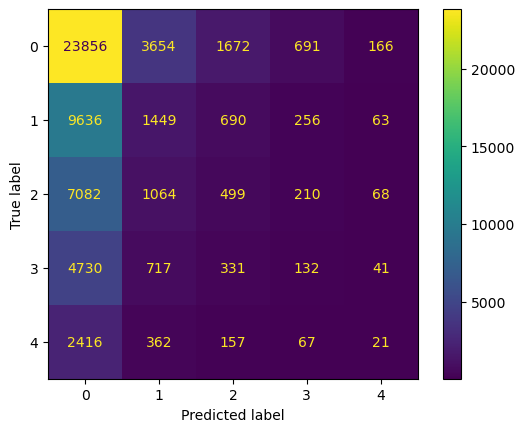

In [173]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

In [174]:
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42,multi_class='multinomial', solver='lbfgs'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}


In [175]:
results = {}

In [176]:
for name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    y_pred_proba = model.predict_proba(X_test)  
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

In [177]:
for name, model in models.items():
    print(f"Training {name}...")

    try:
        model.fit(X_train, y_train)  
        y_pred = model.predict(X_test)  
        
        if hasattr(model, "predict_proba"): 
            y_pred_proba = model.predict_proba(X_test)
            
            if len(set(y_test)) == 2: 
                y_pred_proba = y_pred_proba[:, 1]
                roc_auc = roc_auc_score(y_test, y_pred_proba)
            else: 
                roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
        else:
            roc_auc = "N/A"
        
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = {"Accuracy": accuracy, "ROC-AUC": roc_auc}
        print(f"===== {name} =====")
        print(classification_report(y_test, y_pred))
    
    except Exception as e: 
        print(f"Error in {name}: {e}")

Training Decision Tree...
===== Decision Tree =====
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     30039
           1       0.23      0.00      0.00     12094
           2       0.00      0.00      0.00      8923
           3       1.00      0.00      0.00      5951
           4       0.00      0.00      0.00      3023

    accuracy                           0.50     60030
   macro avg       0.35      0.20      0.13     60030
weighted avg       0.40      0.50      0.33     60030

Training Logistic Regression...
===== Logistic Regression =====
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     30039
           1       0.00      0.00      0.00     12094
           2       0.00      0.00      0.00      8923
           3       0.00      0.00      0.00      5951
           4       0.00      0.00      0.00      3023

    accuracy                           0.50     60030
   macro avg   

**Comparison of Model Performance**

In [179]:
results[name] = {"Accuracy": accuracy,"F1-Score": f1, "ROC-AUC": roc_auc}

In [180]:
results_data = pd.DataFrame(results).T
print("\nComparison of Model Performance:\n", results_data)



Comparison of Model Performance:
                      Accuracy   ROC-AUC  F1-Score
Decision Tree        0.500133  0.500823       NaN
Logistic Regression  0.500400  0.502098       NaN
Random Forest        0.500133  0.504099       NaN
K-Nearest Neighbors  0.432400  0.501055  0.666667


**BEST MODEL**

In [201]:
best_model = results_data.sort_values(by=['Accuracy','ROC-AUC','F1-Score' ]).index[0]
print(f"\n Best Model: {best_model}   ")


 Best Model: K-Nearest Neighbors   


**CONCLUSION**

This project aimed to develop a predictive model for 'ovarian cancer risk and progression' using an integration of clinical and biological data. By integrating patient demographics, medical history, and laboratory results, we have developed a predictive that can assist in early diagnosis and personalized treatment planning.
Through this project, we can conclude that the  K-Nearest Neighbors   model is the best model with low accuracy and F1-Score.